# 프로젝트 1: 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

## (1) 데이터 가져오기
- `sklearn.datasets`의 `load_diabetes`에서 데이터를 가져와주세요.
- `diabetes`의 `data`를 `df_X`에, `target`을 `df_y`에 저장해주세요.

In [1]:
import numpy as np
from sklearn.datasets import load_diabetes

diabetes = load_diabetes(as_frame=True)
df_X = diabetes.data
df_y = diabetes.target
df_X.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641

## (2) 모델에 입력할 데이터 X 준비하기
- `df_X`에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [2]:
X = df_X.values
print(type(X), X.shape)

<class 'numpy.ndarray'> (442, 10)


## (3) 모델에 입력할 데이터 y 준비하기
- `df_y`에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [3]:
y = df_y.values
print(type(y), y.shape)

<class 'numpy.ndarray'> (442,)


## (4) train 데이터와 test 데이터로 분리하기
- X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(331, 10) (331,)
(111, 10) (111,)


## (5) 모델 준비하기
- 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
- 모델 함수를 구현해주세요.

In [5]:
np.random.seed(42)
W = np.random.rand(10)
b = np.random.rand()

print(W.shape, b)

(10,) 0.020584494295802447


In [6]:
def predict(X, W, b):
    return np.dot(X, W) + b

## (6) 손실함수 loss 정의하기
- 손실함수를 MSE 함수로 정의해주세요.

In [7]:
def loss(X, W, b, y):
    predictions = predict(X, W, b)
    return ((predictions - y) ** 2).mean()

## (7) 기울기를 구하는 gradient 함수 구현하기
- 기울기를 계산하는 gradient 함수를 구현해주세요.

In [8]:
def gradient(X, W, b, y):
    N = len(y)
    predictions = predict(X, W, b)
    dW = 1 / N * 2 * X.T.dot(predictions - y)
    db = 2 * (predictions - y).mean()
    return dW, db
    

## (8) 하이퍼 파라미터인 학습률 설정하기
- 학습률, learning rate 를 설정해주세요
- 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [9]:
learning_rate = 0.01

## (9) 모델 학습하기
- 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
- loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
- 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [10]:
losses1 = []
ilist = []
for i in range(1, 35001):
    l = loss(X_train, W, b, y_train)
    dW, db = gradient(X_train, W, b, y_train)
    W -= learning_rate * dW
    b -= learning_rate * db
    losses1.append(l)
    ilist.append(i)
    if i % 1000 == 0:
        print(f"{i} epoch - train loss: {l:.02f}")
    

1000 epoch - train loss: 5372.81
2000 epoch - train loss: 4889.71
3000 epoch - train loss: 4528.54
4000 epoch - train loss: 4254.94
5000 epoch - train loss: 4044.63
6000 epoch - train loss: 3880.45
7000 epoch - train loss: 3750.18
8000 epoch - train loss: 3645.12
9000 epoch - train loss: 3559.03
10000 epoch - train loss: 3487.43
11000 epoch - train loss: 3427.04
12000 epoch - train loss: 3375.47
13000 epoch - train loss: 3330.95
14000 epoch - train loss: 3292.16
15000 epoch - train loss: 3258.08
16000 epoch - train loss: 3227.95
17000 epoch - train loss: 3201.16
18000 epoch - train loss: 3177.23
19000 epoch - train loss: 3155.78
20000 epoch - train loss: 3136.48
21000 epoch - train loss: 3119.09
22000 epoch - train loss: 3103.37
23000 epoch - train loss: 3089.13
24000 epoch - train loss: 3076.23
25000 epoch - train loss: 3064.52
26000 epoch - train loss: 3053.87
27000 epoch - train loss: 3044.19
28000 epoch - train loss: 3035.36
29000 epoch - train loss: 3027.32
30000 epoch - train los

In [11]:
np.random.seed(42)
W2 = np.random.rand(10)
b2 = np.random.rand()

learning_rate2 = 0.001
losses2 = []
for i in range(1, 35001):
    l = loss(X_train, W2, b2, y_train)
    dW, db = gradient(X_train, W2, b2, y_train)
    W2 -= learning_rate2 * dW
    b2 -= learning_rate2 * db
    losses2.append(l)
    if i % 1000 == 0:
        print(f"{i} epoch - train loss: {l:.02f}")

1000 epoch - train loss: 6387.34
2000 epoch - train loss: 5886.55
3000 epoch - train loss: 5808.43
4000 epoch - train loss: 5740.13
5000 epoch - train loss: 5674.04
6000 epoch - train loss: 5609.96
7000 epoch - train loss: 5547.81
8000 epoch - train loss: 5487.53
9000 epoch - train loss: 5429.06
10000 epoch - train loss: 5372.34
11000 epoch - train loss: 5317.31
12000 epoch - train loss: 5263.91
13000 epoch - train loss: 5212.09
14000 epoch - train loss: 5161.80
15000 epoch - train loss: 5112.98
16000 epoch - train loss: 5065.59
17000 epoch - train loss: 5019.58
18000 epoch - train loss: 4974.91
19000 epoch - train loss: 4931.52
20000 epoch - train loss: 4889.39
21000 epoch - train loss: 4848.46
22000 epoch - train loss: 4808.70
23000 epoch - train loss: 4770.06
24000 epoch - train loss: 4732.53
25000 epoch - train loss: 4696.04
26000 epoch - train loss: 4660.58
27000 epoch - train loss: 4626.11
28000 epoch - train loss: 4592.60
29000 epoch - train loss: 4560.01
30000 epoch - train los

In [12]:
np.random.seed(42)
W3 = np.random.rand(10)
b3 = np.random.rand()

learning_rate3 = 0.0001
losses3 = []
for i in range(1, 35001):
    l = loss(X_train, W3, b3, y_train)
    dW, db = gradient(X_train, W3, b3, y_train)
    W3 -= learning_rate3 * dW
    b3 -= learning_rate3 * db
    losses3.append(l)
    if i % 1000 == 0:
        print(f"{i} epoch - train loss: {l:.02f}")

1000 epoch - train loss: 21990.44
2000 epoch - train loss: 16716.64
3000 epoch - train loss: 13179.22
4000 epoch - train loss: 10805.66
5000 epoch - train loss: 9212.25
6000 epoch - train loss: 8141.76
7000 epoch - train loss: 7421.78
8000 epoch - train loss: 6936.76
9000 epoch - train loss: 6609.23
10000 epoch - train loss: 6387.27
11000 epoch - train loss: 6236.09
12000 epoch - train loss: 6132.35
13000 epoch - train loss: 6060.42
14000 epoch - train loss: 6009.82
15000 epoch - train loss: 5973.53
16000 epoch - train loss: 5946.83
17000 epoch - train loss: 5926.56
18000 epoch - train loss: 5910.63
19000 epoch - train loss: 5897.59
20000 epoch - train loss: 5886.51
21000 epoch - train loss: 5876.75
22000 epoch - train loss: 5867.88
23000 epoch - train loss: 5859.61
24000 epoch - train loss: 5851.76
25000 epoch - train loss: 5844.19
26000 epoch - train loss: 5836.81
27000 epoch - train loss: 5829.57
28000 epoch - train loss: 5822.44
29000 epoch - train loss: 5815.38
30000 epoch - train

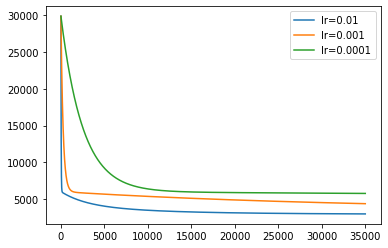

In [17]:
import matplotlib.pyplot as plt

plt.plot(ilist, losses1, label="lr=0.01")
plt.plot(ilist, losses2, label="lr=0.001")
plt.plot(ilist, losses3, label="lr=0.0001")
plt.legend()

하이퍼 파라미터인 학습률이 일단 높을수록 빠르게 좋은 결과로 수렴하는것으로 보임

In [27]:
np.random.seed(42)
W4 = np.random.rand(9)
b4 = np.random.rand()

for i in range(1, 35001):
    l = loss(X_train[:, 1:], W4, b4, y_train)
    dW, db = gradient(X_train[:, 1:], W4, b4, y_train)
    W4 -= learning_rate * dW
    b4 -= learning_rate * db
    if i % 1000 == 0:
        print(f"{i} epoch - train loss: {l:.02f}")

1000 epoch - train loss: 5387.57
2000 epoch - train loss: 4910.21
3000 epoch - train loss: 4550.27
4000 epoch - train loss: 4275.54
5000 epoch - train loss: 4063.05
6000 epoch - train loss: 3896.34
7000 epoch - train loss: 3763.60
8000 epoch - train loss: 3656.33
9000 epoch - train loss: 3568.36
10000 epoch - train loss: 3495.20
11000 epoch - train loss: 3433.57
12000 epoch - train loss: 3381.03
13000 epoch - train loss: 3335.77
14000 epoch - train loss: 3296.42
15000 epoch - train loss: 3261.94
16000 epoch - train loss: 3231.53
17000 epoch - train loss: 3204.55
18000 epoch - train loss: 3180.51
19000 epoch - train loss: 3158.99
20000 epoch - train loss: 3139.68
21000 epoch - train loss: 3122.30
22000 epoch - train loss: 3106.61
23000 epoch - train loss: 3092.44
24000 epoch - train loss: 3079.60
25000 epoch - train loss: 3067.96
26000 epoch - train loss: 3057.39
27000 epoch - train loss: 3047.78
28000 epoch - train loss: 3039.04
29000 epoch - train loss: 3031.07
30000 epoch - train los

## (10) test 데이터에 대한 성능 확인하기
- test 데이터에 대한 성능을 확인해주세요.

In [14]:
test_loss = loss(X_test, W, b, y_test)
print(f"test loss: {test_loss}")

test loss: 2810.269563510548


## (11) 정답 데이터와 예측한 데이터 시각화하기
- x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

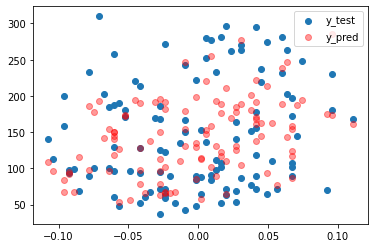

In [15]:
import matplotlib.pyplot as plt

y_predict = predict(X_test, W, b)
plt.scatter(X_test[:, 0], y_test, label="y_test")
plt.scatter(X_test[:, 0], y_predict, color="red", alpha=0.4, label="y_pred")
plt.legend()

비교적 예측치가 실제결과를 잘 나타내고 있음이 보임.